In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the dataset
dataset = pd.read_csv("covid19_Confirmed_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [3]:
dataset.shape

(266, 104)

In [8]:
#delete the usless columns
df = dataset.drop(["Lat","Long"], axis = 1, inplace = True)

In [9]:
dataset.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [10]:
#aggreagate the rows by the country
corona_dataset_aggregated = dataset.groupby("Country/Region").sum()

In [12]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [15]:
corona_dataset_aggregated.shape

(187, 101)

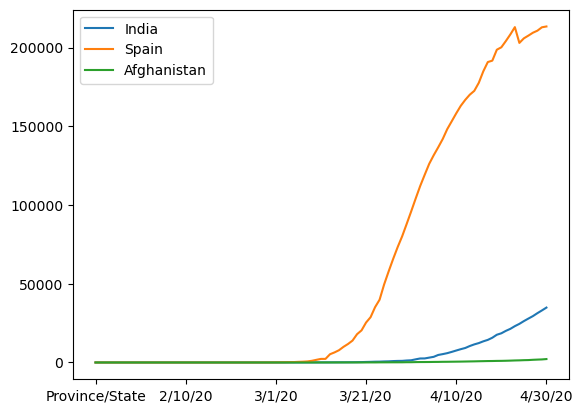

In [21]:
#visualise data realted to a country 
corona_dataset_aggregated.loc["India"].plot()
corona_dataset_aggregated.loc["Spain"].plot()
corona_dataset_aggregated.loc["Afghanistan"].plot()
plt.legend()

<Axes: >

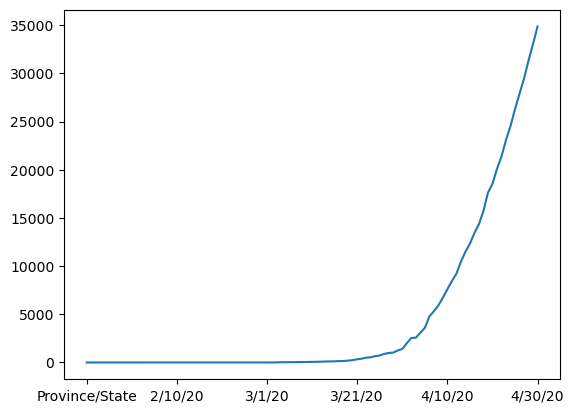

In [22]:
#calculaate  good measure
corona_dataset_aggregated.loc["India"].plot()

<Axes: >

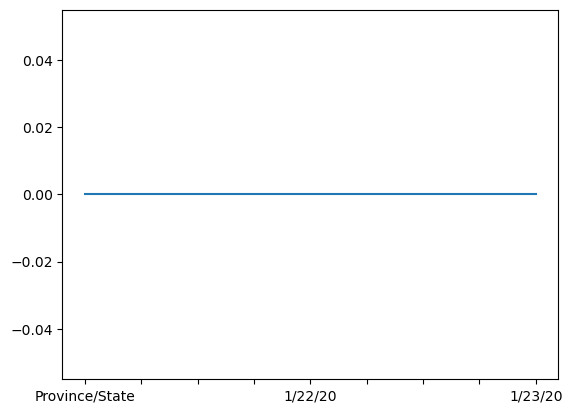

In [23]:
corona_dataset_aggregated.loc["India"][:3].plot()

<Axes: >

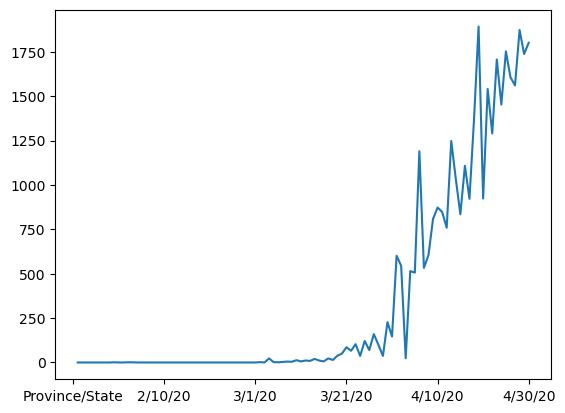

In [25]:
#calculate the first dericate of the curve
corona_dataset_aggregated.loc["India"].diff().plot()


In [26]:
#maximum infection rate
corona_dataset_aggregated.loc["India"].diff().max()

1893

In [ ]:
countries = list(corona_dataset_aggregated.index)
max_infection_rates = []

for c in countries:
    max_infection_rates.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated("Max_infection_rate")= max_infection_rates

In [40]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


In [ ]:
#create a new dataframe
corona_data = pd.dataframe(corona_data_aggreagated["Max_infection_rates"])

In [ ]:
corona_data

In [47]:
#importing the dataset 2 
happiness_report = pd.read_csv("worldwide_happiness_report.csv")

In [48]:
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [55]:
#drop the usless coloums
useless_cols = ["Overall rank","Score","Generosity","Perceptions of corruption"]

In [56]:
happiness_report.drop(useless_cols, axis=1, inplace = True)
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [57]:
happiness_report.set_index("Country or region", inplace = True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [64]:
#join the dataset
data.shape

(187, 101)

In [59]:
happiness_report.shape

(156, 4)

In [77]:
data =data.join(happiness_report, how ="inner")
data

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,0.350,0.517,0.361,0.000
Albania,0,0,0,0,0,0,0,0,0,0,...,712,726,736,750,766,773,0.947,0.848,0.874,0.383
Algeria,0,0,0,0,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,1.002,1.160,0.785,0.086
Argentina,0,0,0,0,0,0,0,0,0,0,...,3780,3892,4003,4127,4285,4428,1.092,1.432,0.881,0.471
Armenia,0,0,0,0,0,0,0,0,0,0,...,1677,1746,1808,1867,1932,2066,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,323,325,329,329,331,333,0.960,1.427,0.805,0.154
Vietnam,0,0,2,2,2,2,2,2,2,2,...,270,270,270,270,270,270,0.741,1.346,0.851,0.543
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,6,6,0.287,1.163,0.463,0.143
Zambia,0,0,0,0,0,0,0,0,0,0,...,84,88,88,95,97,106,0.578,1.058,0.426,0.431


In [ ]:
data.corr()

In [73]:
data

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1463,1531,1703,1828,1939,2171,0.350,0.517,0.361,0.000
Albania,0,0,0,0,0,0,0,0,0,0,...,712,726,736,750,766,773,0.947,0.848,0.874,0.383
Algeria,0,0,0,0,0,0,0,0,0,0,...,3256,3382,3517,3649,3848,4006,1.002,1.160,0.785,0.086
Argentina,0,0,0,0,0,0,0,0,0,0,...,3780,3892,4003,4127,4285,4428,1.092,1.432,0.881,0.471
Armenia,0,0,0,0,0,0,0,0,0,0,...,1677,1746,1808,1867,1932,2066,0.850,1.055,0.815,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,0,0,0,0,...,323,325,329,329,331,333,0.960,1.427,0.805,0.154
Vietnam,0,0,2,2,2,2,2,2,2,2,...,270,270,270,270,270,270,0.741,1.346,0.851,0.543
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,6,6,0.287,1.163,0.463,0.143
Zambia,0,0,0,0,0,0,0,0,0,0,...,84,88,88,95,97,106,0.578,1.058,0.426,0.431


In [ ]:
#vaiselation
x = data["GDP per captia"]
y = data["Max infection rates"]
sns.scatterplot(x,np.log(y)) #logscaling

In [ ]:
sns.regplot(x,np.log(y))

In [ ]:
x = data["Social Support"]
y = data["Max infection rates"]
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x, np.log(y))

In [ ]:
x = data["Healthy life expectancy"]
y = data["Max infection rates"]
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x,np.log(y))

In [ ]:
x = data["Freedom to make life choices"]
y = data["Max infection rates"]
sns.scatterplot(x,np.log(y))

In [ ]:
sns.regplot(x,np.log(y))